In [2]:
pip install pandas numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.6 MB 643 kB/s eta 0:00:01     |█████▊                          | 2.2 MB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 7.9 MB 33.9 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 507 kB 25.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 39.7 MB/s eta 0:00:01
     |████████████████████████████████| 265 kB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 6.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip ins

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set(font_scale=1.2)

Matplotlib is building the font cache; this may take a moment.


In [5]:
folder_path = "/Users/jisu/Library/Mobile Documents/com~apple~CloudDocs/Desktop/project"


In [10]:
file_names = [
    "exchange rate,monthly.json",
    "Key Indicators On Household Employment Income Among Resident Employed Households, Annual.json",
    "Median Gross Monthly Income From Employment (Including Employer CPF) Of Full-Time Employed Residents By Occupations And Sex, End June, Annual.json",
    "Resident Households by Monthly Household Income from Work and Number of Employed Persons in Household (Census of Population 2020).json",
    "unemploymentrate_season.json",
    "interest rate.json",
    "Resident Households by Monthly Household Income from Work and Type of Dwelling (Census of Population 2020).json",
    "Consumer Price Index (CPI), 2024 As Base Year, Monthly, Seasonally Adjusted.json",
    "Percent Change In Consumer Price Index (CPI) Over Corresponding Period Of Previous Year, 2024 As Base Year, Annual.json",
    "Consumer Price Index (CPI) By Household Income Group, Middle 60%, 2019 As Base Year, Annual.json"
]


In [17]:
import json
import pandas as pd
import os

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)

        print(f"file: {file_name}")

        if isinstance(data, dict):
            print("Dictionary")
            print("Top-level keys:", list(data.keys()))

        elif isinstance(data, list):
            print("List")
            df = pd.DataFrame(data)
            print(df.info())
            print(df.head())

        print("=" * 80)

    except Exception as e:
        print(f"{e}")


file: exchange rate,monthly.json
Dictionary
Top-level keys: ['row', 'ID', 'Title', 'Footnote', 'DataSource', 'frequency', 'GeneratedBy', 'DataLastUpdated', 'DateGenerated', 'Contact']
file: Key Indicators On Household Employment Income Among Resident Employed Households, Annual.json
Dictionary
Top-level keys: ['row', 'ID', 'Title', 'Footnote', 'DataSource', 'frequency', 'GeneratedBy', 'DataLastUpdated', 'DateGenerated', 'Contact']
file: Median Gross Monthly Income From Employment (Including Employer CPF) Of Full-Time Employed Residents By Occupations And Sex, End June, Annual.json
Dictionary
Top-level keys: ['row', 'ID', 'Title', 'Footnote', 'DataSource', 'frequency', 'GeneratedBy', 'DataLastUpdated', 'DateGenerated', 'Contact']
file: Resident Households by Monthly Household Income from Work and Number of Employed Persons in Household (Census of Population 2020).json
Dictionary
Top-level keys: ['row', 'ID', 'Title', 'footnote', 'dataSource', 'frequencyType', 'GeneratedBy', 'DataLastUpd

In [34]:
import pandas as pd
import os

folder_path = "/Users/jisu/Library/Mobile Documents/com~apple~CloudDocs/Desktop/project"

monthly_files = [
    "Exchange Rates (Average For Period), Monthly.json",
    "Current Banks Interest Rates (End Of Period), Monthly.json",
    "Consumer Price Index (CPI), 2024 As Base Year, Monthly, Seasonally Adjusted.json"
]

dataframes = []

def parse_json(file_path, source):
    with open(file_path, "r") as f:
        data = pd.read_json(f)
    
    if "row" in data:
        data = pd.json_normalize(data["row"], "columns")
    
    df = pd.DataFrame(data)
    df.columns = ["Date", "Value"]
    df["Year"] = df["Date"].apply(lambda x: int(x.split(" ")[0]))
    df["Month"] = df["Date"].apply(lambda x: x.split(" ")[1])
    df["Source"] = source
    return df

for file in monthly_files:
    file_path = os.path.join(folder_path, file)
    source = file.split(".")[0]
    df = parse_json(file_path, source)
    dataframes.append(df)

df_combined = pd.concat(dataframes, ignore_index=True)
df_combined = df_combined.sort_values(by=["Year", "Month"])


In [37]:
import pandas as pd

print(df_combined.head(10))



           Date    Value  Year Month  \
8008   1961 Apr   20.924  1961   Apr   
8777   1961 Apr    18.38  1961   Apr   
12377  1961 Apr   56.423  1961   Apr   
13628  1961 Apr   23.256  1961   Apr   
14879  1961 Apr   28.173  1961   Apr   
17094  1961 Apr   16.178  1961   Apr   
19068  1961 Apr   15.164  1961   Apr   
20801  1961 Apr  153.546  1961   Apr   
22293  1961 Apr   28.284  1961   Apr   
24749  1961 Apr   13.774  1961   Apr   

                                                  Source  
8008   Consumer Price Index (CPI), 2024 As Base Year,...  
8777   Consumer Price Index (CPI), 2024 As Base Year,...  
12377  Consumer Price Index (CPI), 2024 As Base Year,...  
13628  Consumer Price Index (CPI), 2024 As Base Year,...  
14879  Consumer Price Index (CPI), 2024 As Base Year,...  
17094  Consumer Price Index (CPI), 2024 As Base Year,...  
19068  Consumer Price Index (CPI), 2024 As Base Year,...  
20801  Consumer Price Index (CPI), 2024 As Base Year,...  
22293  Consumer Price Index 

In [42]:
import pandas as pd
import os

folder_path = "/Users/jisu/Library/Mobile Documents/com~apple~CloudDocs/Desktop/project"

monthly_files = {
    "Exchange Rates (Average For Period), Monthly.json": "Exchange Rate (SGD/USD)",
    "Current Banks Interest Rates (End Of Period), Monthly.json": "Interest Rate (%)",
    "Consumer Price Index (CPI), 2024 As Base Year, Monthly, Seasonally Adjusted.json": "CPI (2024 Base)"
}

dataframes = []

def parse_json(file_path, column_name):
    with open(file_path, "r") as f:
        data = pd.read_json(f)
    
    if "row" in data:
        data = pd.json_normalize(data["row"], "columns")
    
    df = pd.DataFrame(data)
    df.columns = ["Month", "Value"]
    df[column_name] = pd.to_numeric(df["Value"], errors='coerce')
    df = df.drop(columns=["Value"])
    return df

for file, column_name in monthly_files.items():
    file_path = os.path.join(folder_path, file)
    df = parse_json(file_path, column_name)
    dataframes.append(df)

df_combined = dataframes[0]
for df in dataframes[1:]:
    df_combined = pd.merge(df_combined, df, on="Month", how="outer")


In [43]:
import pandas as pd

print(df_combined.head(10))

      Month  Exchange Rate (SGD/USD)  Interest Rate (%)  CPI (2024 Base)
0  1961 Apr                      NaN                NaN           20.924
1  1961 Apr                      NaN                NaN           18.380
2  1961 Apr                      NaN                NaN           56.423
3  1961 Apr                      NaN                NaN           23.256
4  1961 Apr                      NaN                NaN           28.173
5  1961 Apr                      NaN                NaN           16.178
6  1961 Apr                      NaN                NaN           15.164
7  1961 Apr                      NaN                NaN          153.546
8  1961 Apr                      NaN                NaN           28.284
9  1961 Apr                      NaN                NaN           13.774


In [44]:
import pandas as pd
import os

folder_path = "/Users/jisu/Library/Mobile Documents/com~apple~CloudDocs/Desktop/project"

quarterly_files = {
    "Unemployment Rate (End Of Period), Quarterly, Seasonally Adjusted.json": "Unemployment Rate (%)"
}

dataframes = []

def parse_quarterly_json(file_path, column_name):
    with open(file_path, "r") as f:
        data = pd.read_json(f)
    
    if "row" in data:
        data = pd.json_normalize(data["row"], "columns")
    
    df = pd.DataFrame(data)
    df.columns = ["Quarter", "Value"]
    df[column_name] = pd.to_numeric(df["Value"], errors='coerce')
    df = df.drop(columns=["Value"])
    df["Year"] = df["Quarter"].apply(lambda x: int(x.split(" ")[0]))
    df["Quarter"] = df["Quarter"].apply(lambda x: x.split(" ")[1])
    return df

for file, column_name in quarterly_files.items():
    file_path = os.path.join(folder_path, file)
    df = parse_quarterly_json(file_path, column_name)
    dataframes.append(df)

df_quarterly_combined = dataframes[0]
for df in dataframes[1:]:
    df_quarterly_combined = pd.merge(df_quarterly_combined, df, on=["Year", "Quarter"], how="outer")


In [45]:
import pandas as pd

print(df_quarterly_combined.head(10))

  Quarter  Unemployment Rate (%)  Year
0      1Q                    1.8  1992
1      2Q                    1.8  1992
2      3Q                    2.0  1992
3      4Q                    1.6  1992
4      1Q                    1.5  1993
5      2Q                    1.8  1993
6      3Q                    1.8  1993
7      4Q                    1.6  1993
8      1Q                    1.7  1994
9      2Q                    1.6  1994


In [51]:
import pandas as pd
import os
import json

folder_path = "/Users/jisu/Library/Mobile Documents/com~apple~CloudDocs/Desktop/project"

file_names = {
    "household_income": "Key Indicators On Household Employment Income Among Resident Employed Households, Annual.json",
    "individual_income": "Median Gross Monthly Income From Employment (Including Employer CPF) Of Full-Time Employed Residents By Occupations And Sex, End June, Annual.json",
    "cpi_change": "Percent Change In Consumer Price Index (CPI) Over Corresponding Period Of Previous Year, 2024 As Base Year, Annual.json",
    "middle_60_cpi": "Consumer Price Index (CPI) By Household Income Group, Middle 60%, 2019 As Base Year, Annual.json"
}

def fast_extract_json(file_path, value_name):
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)
    
    extracted_data = [{"Year": int(col["Key"]), value_name: float(col["Value"])}
                      for row in data["row"] for col in row["columns"]]
    
    return pd.DataFrame(extracted_data)

household_income = fast_extract_json(os.path.join(folder_path, file_names["household_income"]), "Median_Household_Income")
individual_income = fast_extract_json(os.path.join(folder_path, file_names["individual_income"]), "Median_Individual_Income")
cpi_change = fast_extract_json(os.path.join(folder_path, file_names["cpi_change"]), "CPI_Change")
middle_60_cpi = fast_extract_json(os.path.join(folder_path, file_names["middle_60_cpi"]), "CPI_Middle_60")

dfs = [household_income, individual_income, cpi_change, middle_60_cpi]

for df in dfs:
    df.drop_duplicates(subset="Year", keep="first", inplace=True)

merged_data = dfs[0]
for df in dfs[1:]:
    merged_data = merged_data.merge(df, on="Year", how="outer")

merged_data.sort_values(by="Year", inplace=True)
merged_data.interpolate(method="linear", inplace=True)

output_path = os.path.join(folder_path, "merged_data.csv")
merged_data.to_csv(output_path, index=False)

print(f" {output_path}")


 /Users/jisu/Library/Mobile Documents/com~apple~CloudDocs/Desktop/project/merged_data.csv


In [55]:
import pandas as pd
import os
import json

folder_path = "/Users/jisu/Library/Mobile Documents/com~apple~CloudDocs/Desktop/project"
cpi_file = "Consumer Price Index (CPI) By Household Income Group, Middle 60%, 2019 As Base Year, Annual.json"

with open(os.path.join(folder_path, cpi_file), "r", encoding="utf-8") as file:
    raw_data = json.load(file)

def extract_cpi_categories(data):
    cpi_records = []
    
    for category in data["row"]:
        category_name = category["rowText"]
        for entry in category["columns"]:
            year = int(entry["Key"])
            value = float(entry["Value"])
            cpi_records.append({"Year": year, "Category": category_name, "CPI_Index": value})
    
    return pd.DataFrame(cpi_records)

cpi_df = extract_cpi_categories(raw_data)

cpi_df.sort_values(["Category", "Year"], inplace=True)

cpi_df["Year"] = cpi_df["Year"].astype(int)

cpi_df["CPI_Index"] = (
    cpi_df.groupby("Category")["CPI_Index"]
    .apply(lambda x: x.interpolate(method="linear", limit_direction="both"))
    .reset_index(level=0, drop=True)
)

output_file = os.path.join(folder_path, "cpi_categories.csv")
cpi_df.to_csv(output_file, index=False)

print("", output_file)

print(cpi_df.head())


 /Users/jisu/Library/Mobile Documents/com~apple~CloudDocs/Desktop/project/cpi_categories.csv
     Year       Category  CPI_Index
391  2014  Accommodation    116.396
392  2015  Accommodation    113.461
393  2016  Accommodation    109.340
394  2017  Accommodation    104.722
395  2018  Accommodation    101.162


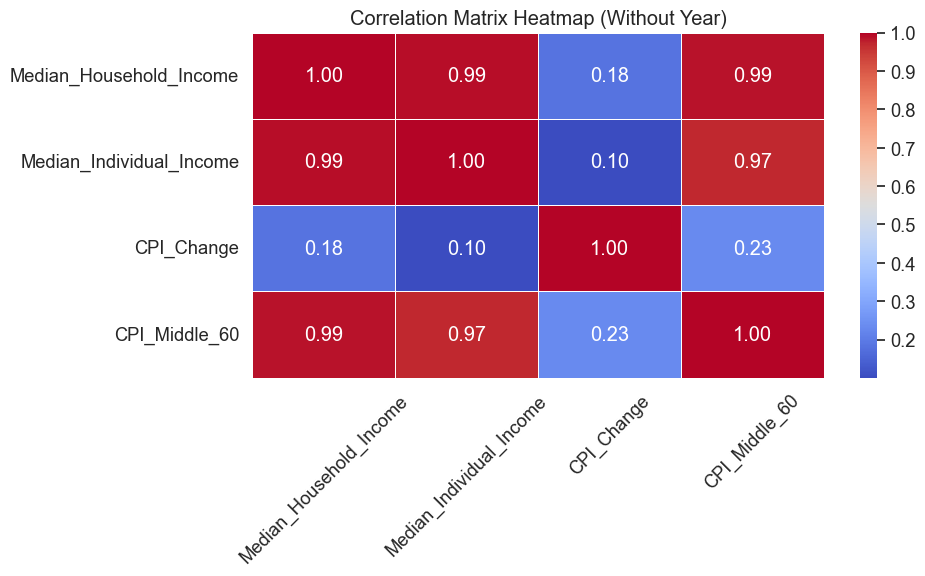

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = "/Users/jisu/Library/Mobile Documents/com~apple~CloudDocs/Desktop/project"

file_path = os.path.join(folder_path, "merged_data.csv")
df = pd.read_csv(file_path)

df = df.drop(columns=["Year"], errors="ignore")

for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        pass

correlation_matrix = df.corr()

correlation_file = os.path.join(folder_path, "correlation_matrix_no_year.csv")
correlation_matrix.to_csv(correlation_file, index=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Without Year)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

heatmap_path = os.path.join(folder_path, "correlation_heatmap_no_year.png")
plt.savefig(heatmap_path)
plt.show()
